<a href="https://colab.research.google.com/github/kikiru328/practice_code/blob/main/Face_segmentation_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shutil
shutil.copy('/content/drive/MyDrive/연습용코드본/Face_Segmentation/headsegmentation_dataset_ccncsa.zip','/content/data.zip')
shutil.unpack_archive('/content/data.zip','/content/faceSegmentation/dataset')

In [ ]:
!mkdir '/content/faceSegmentation/output'

In [ ]:
import os
import cv2
from PIL import Image
import json
import shutil

# path where the dataset is downloaded
inputPath = r"/content/faceSegmentation/dataset/images/"
labelsPath = r"/content/faceSegmentation/dataset/labels/"

# new folder where the cleanedup and organized dataset is placed
outputPath = r"/content/faceSegmentation/dataset/output"

# Step 1: Look at folder arrangement
labelsDist = sorted(os.listdir(labelsPath))

In [ ]:
for folder in labelsDist:
    os.mkdir(os.path.join(outputPath, folder))

In [ ]:
folderTypes = {"female": [], "male": [], "multiperson": [], "real": []}

for folder in os.listdir(inputPath):
    if folder.startswith("female"):
        folderTypes["female"].append(folder.split("_")[0])
        if os.path.isdir(os.path.join(outputPath, folderTypes["female"][-1])):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, folderTypes["female"][-1], file))
    
    elif folder.startswith("multiperson"):
        folderTypes["multiperson"].append(folder.split("_")[0])
        if os.path.isdir(os.path.join(outputPath, folderTypes["multiperson"][-1])):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, folderTypes["multiperson"][-1], file))
    
    elif folder.startswith("male"):
        
        folderTypes["male"].append(folder.split("_")[0])
        if folder.startswith("male06") and "nolight" in folder:
            outFolder = "male06_2"
        
        elif folder.startswith("male06"):
            outFolder = "male06_1"
        
        else:
            outFolder = folderTypes["male"][-1]
        if os.path.isdir(os.path.join(outputPath, outFolder)):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, outFolder, file))

    else:
        if folder.startswith("real") and os.path.isdir(os.path.join(outputPath, "real")):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, "real", file))
        

In [ ]:
for folder in labelsDist:
    if len(os.listdir(os.path.join(labelsPath, folder))) != len(os.listdir(os.path.join(outputPath, folder))):
        print(folder, len(os.listdir(os.path.join(labelsPath, folder))), len(os.listdir(os.path.join(outputPath, folder))))


female23 501 334
femalealison1 501 167
femalealison2 501 167
femalebarbera 501 334
femalecarla 501 334
femalefelice 501 251
femalejoyce 501 334
femalelaura 501 334
male06_1 351 284
male06_2 501 393
male09 351 117
male23 501 167
maleandrew 501 334
malebruce 501 334
malecarlos 501 334
malecarlos2 501 251
malecorry 501 334
maleelias 501 333
malegaberial 501 334
maleshawn 501 334
real 2505 2500


In [ ]:
from glob import glob
real_labels = glob('/content/faceSegmentation/dataset/labels/real/*')
for i, real in enumerate(real_labels):
    f = os.path.basename(real).split('.png')[0]
    change = str(f'r{i}')
    os.rename(real, os.path.split(real)[0]+'/'+change+os.path.splitext(real)[1])

In [ ]:
import os
b = os.path.basename('/content/faceSegmentation/dataset/labels/real/image31426.jpg_RESAMPLED_5b2b5d709a20f224_scaled.png').split('.png')[0]
print(b)
i = 1
change = str(f'r{i}')
b = b.replace(b,change)
print(b)

image31426.jpg_RESAMPLED_5b2b5d709a20f224_scaled
r1


In [ ]:
from glob import glob
real_imgs = glob('/content/faceSegmentation/dataset/output/real/*')
for i, real in enumerate(real_imgs):
    f = os.path.basename(real).split('.png')[0]
    change = str(f'r{i}')
    os.rename(real, os.path.split(real)[0]+'/'+change+os.path.splitext(real)[1])

In [ ]:
shutil.copytree('/content/faceSegmentation/dataset/labels','/content/Ass/masks')
shutil.copytree('/content/faceSegmentation/dataset/output','/content/Ass/imgs')

'/content/Ass/imgs'

In [ ]:
im = glob('/content/Ass/imgs/*')
save_path = '/content/ff/imgs'
for a in im:
    b = glob(a+'/*')
    for k in b:
        fol_name = os.path.split(k)[0].split('imgs/')[1]
        file_name = os.path.basename(k)
        save = f'{save_path}/{fol_name}_{file_name}'
        shutil.copy(k,save)

In [ ]:
a = '/content/Ass/imgs/female03/headrende0000.png'
save_path = '/content/ff/imgs'
fol_name = os.path.split(a)[0].split('imgs/')[1]
file_name = os.path.basename(a)
save = f'{save_path}/{fol_name}_{file_name}'
print(save)

/content/ff/imgs/female03_headrende0000.png


In [ ]:
im = glob('/content/Ass/masks/*')
save_path = '/content/ff/masks'
for a in im:
    b = glob(a+'/*')
    for k in b:
        fol_name = os.path.split(k)[0].split('masks/')[1]
        file_name = os.path.basename(k)
        save = f'{save_path}/{fol_name}_{file_name}'
        shutil.copy(k,save)

In [ ]:
img = os.listdir('/content/ff/imgs')
mas = os.listdir('/content/ff/masks')

In [ ]:
img_ = glob('/content/ff/imgs/*')
mas_ = glob('/content/ff/masks/*')

img_j = glob('/content/ff/imgs/*.jpg')
mas_j = glob('/content/ff/masks/*.jpg')

In [ ]:
print(len(img_j))
print(len(mas_j))

669
0


In [ ]:
print(len(img))
print(len(mas))
print(len(img_))
print(len(mas_))
# 14649
# 19239

15318
19239
15318
19239


In [ ]:
jpg = []
for i in img_j:
    if '.jpg' in i:
        jpg.append(i)
    else:
        pass

In [ ]:
len(jpg)

669

In [ ]:
os.path.basename(jpg[0]).replace('jpg','png')

'real_r949.png'

In [ ]:
os.path.dirname(jpg[0]) + os.path.basename(jpg[0]).replace('jpg','png')

'/content/ff/imgsreal_r949.png'

In [ ]:
for i in jpg:
    change = os.path.basename(i).replace('.jpg','png')
    os.rename(i, os.path.dirname(i)+ '/' + os.path.basename(i).replace('jpg','png'))

In [ ]:
img_j_c = glob('/content/ff/imgs/*.jpg')
mas_j_c = glob('/content/ff/masks/*.jpg')

In [ ]:
print(len(img_j_c))
print(len(mas_j_c))

0
0


In [ ]:
img = os.listdir('/content/ff/imgs')
mas = os.listdir('/content/ff/masks')

img_ = glob('/content/ff/imgs/*')
mas_ = glob('/content/ff/masks/*')

img_j = glob('/content/ff/imgs/*.jpg')
mas_j = glob('/content/ff/masks/*.jpg')

In [ ]:
print(len(img))
print(len(mas))
print(len(img_))
print(len(mas_))
print(len(img_j))
print(len(mas_j))

15318
19239
15318
19239
0
0


In [ ]:
img[0]

'femalefelice_headrende0080.png'

In [ ]:
mas[0]

'malecarlos_headrende0006.png'

In [ ]:
error = []
for m in mas:
    if m not in img:
        error.append(m)

In [ ]:
len(error)

3971

In [ ]:
19239-15318

3921

In [ ]:
error[0]

'malecarlos_headrende0006.png'

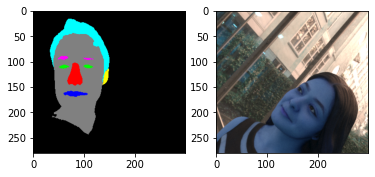

In [ ]:
import matplotlib.pyplot as plt
import cv2
plt.subplot(121)
plt.imshow(cv2.imread(os.path.dirname(mas_[0]) + '/' + error[0]))
plt.subplot(122)
plt.imshow(cv2.imread(os.path.dirname(img_[0]+'/'+_)))